This is my personal planning stage notebook, to try and maniplate the given data sets and create visualizations to answer the given questions. My question is:

"We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


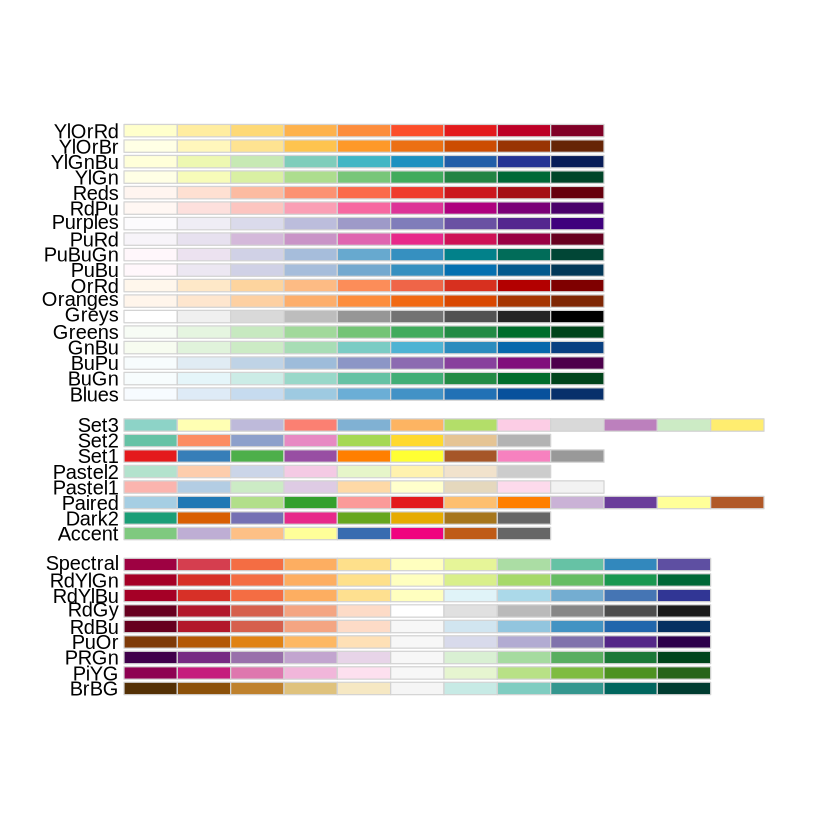

In [1]:
library(tidyverse)
library(RColorBrewer)
display.brewer.all()

In [2]:
url <- "https://raw.githubusercontent.com/liambaldin/DSCI-100-Project-Planning-Stage/refs/heads/main/players.csv"
download.file(url, "players.csv")
players <- read_csv("players.csv", skip = 1)
players

url2 <- "https://raw.githubusercontent.com/liambaldin/DSCI-100-Project-Planning-Stage/refs/heads/main/sessions.csv"
download.file(url2, "sessions.csv")
sessions <- read_csv("sessions.csv")
sessions

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA,NA
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In the players.csv data set, there are 9 variables and 196 observations. There are 3 logical type variables (subscribe, individualId,organizationName), 2 double type variables(played_hours, age), and 4 character type variables(gender, name, hashedEmail, experience). For my question of predicting the "types" of players I will use this data set, as it has information about the types of players in the study. The variables I will use are:
- experience: experince level of player
- gender: players gender
- played_hours: The total time olayed by a participant (in hours)
- age: the players age

Each observation gives all the information about each individual player.



In the sessions.csv data set, there are 5 variables and 1535 observations. There are 3 character type variables (hashedEmail, start_time, end_time) and 2 double type variables (original_start_time, original_end_time). 
- hashedEmail: encyrpted email
- start_time: the date and time of the session
- end_time: the date and time of the session
- original_start_time: the otoginal start time of the session
- original_end time: the oroginal end time of the session

I will not use this dataset to answer my question, as it dies not talk about the types of people playing, only when people are playing. Each observation gives information about a specific play session. 

In [3]:
players_relevant <- players |>
                        select(experience, played_hours, gender, age)
players_relevant

experience,played_hours,gender,age
<chr>,<dbl>,<chr>,<dbl>
Pro,30.3,Male,9
Veteran,3.8,Male,17
Veteran,0.0,Male,17
Amateur,0.7,Female,21
Regular,0.1,Male,21
Amateur,0.0,Female,17
Regular,0.0,Female,19
Amateur,0.0,Male,21
Amateur,0.1,Male,17


Warning message:
“Removed 19 rows containing missing values or values outside the scale range
(`geom_bar()`).”


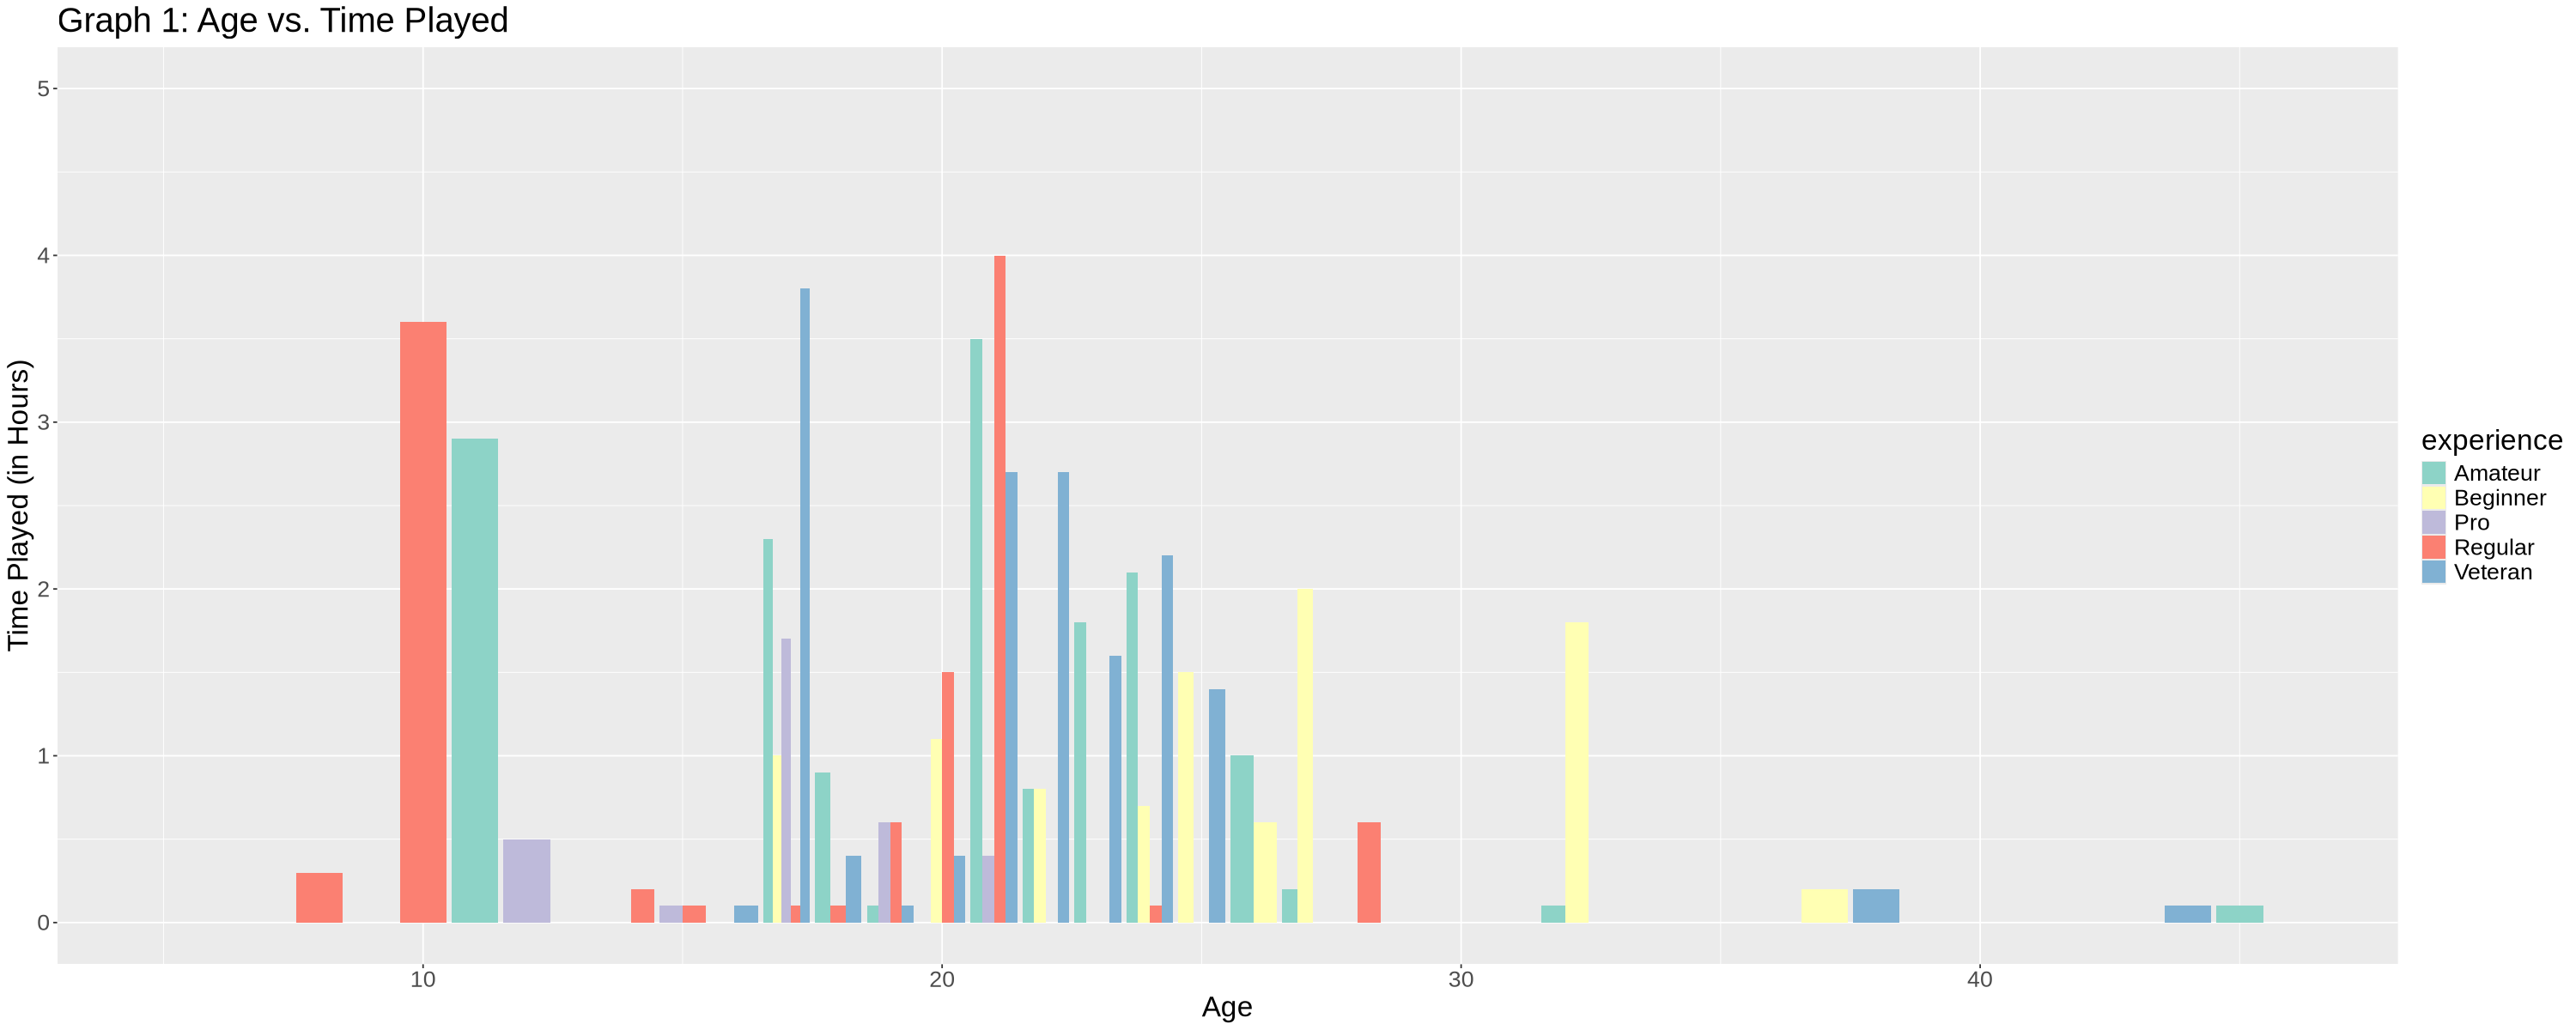

In [8]:
options(repr.plot.width = 25, repr.plot.height = 10) 
age_plot <- ggplot(players_relevant, aes(x = age,y = played_hours, fill = experience)) +
                geom_bar(stat = "identity", position = "dodge") +
                labs(x = "Age", y = "Time Played (in Hours)", color = "Experience") +
                ggtitle("Graph 1: Age vs. Time Played") +
                theme(text = element_text(size=20)) +
                xlim(c(5, 46)) +
                ylim(c(0, 5)) +
                scale_fill_brewer(palette = 'Set3')
age_plot

For graph 1, I am inferring that people between the ages of 15-25 are more likely to contribute data, and regular and amateur players are more likely to contrubute time than veterans.

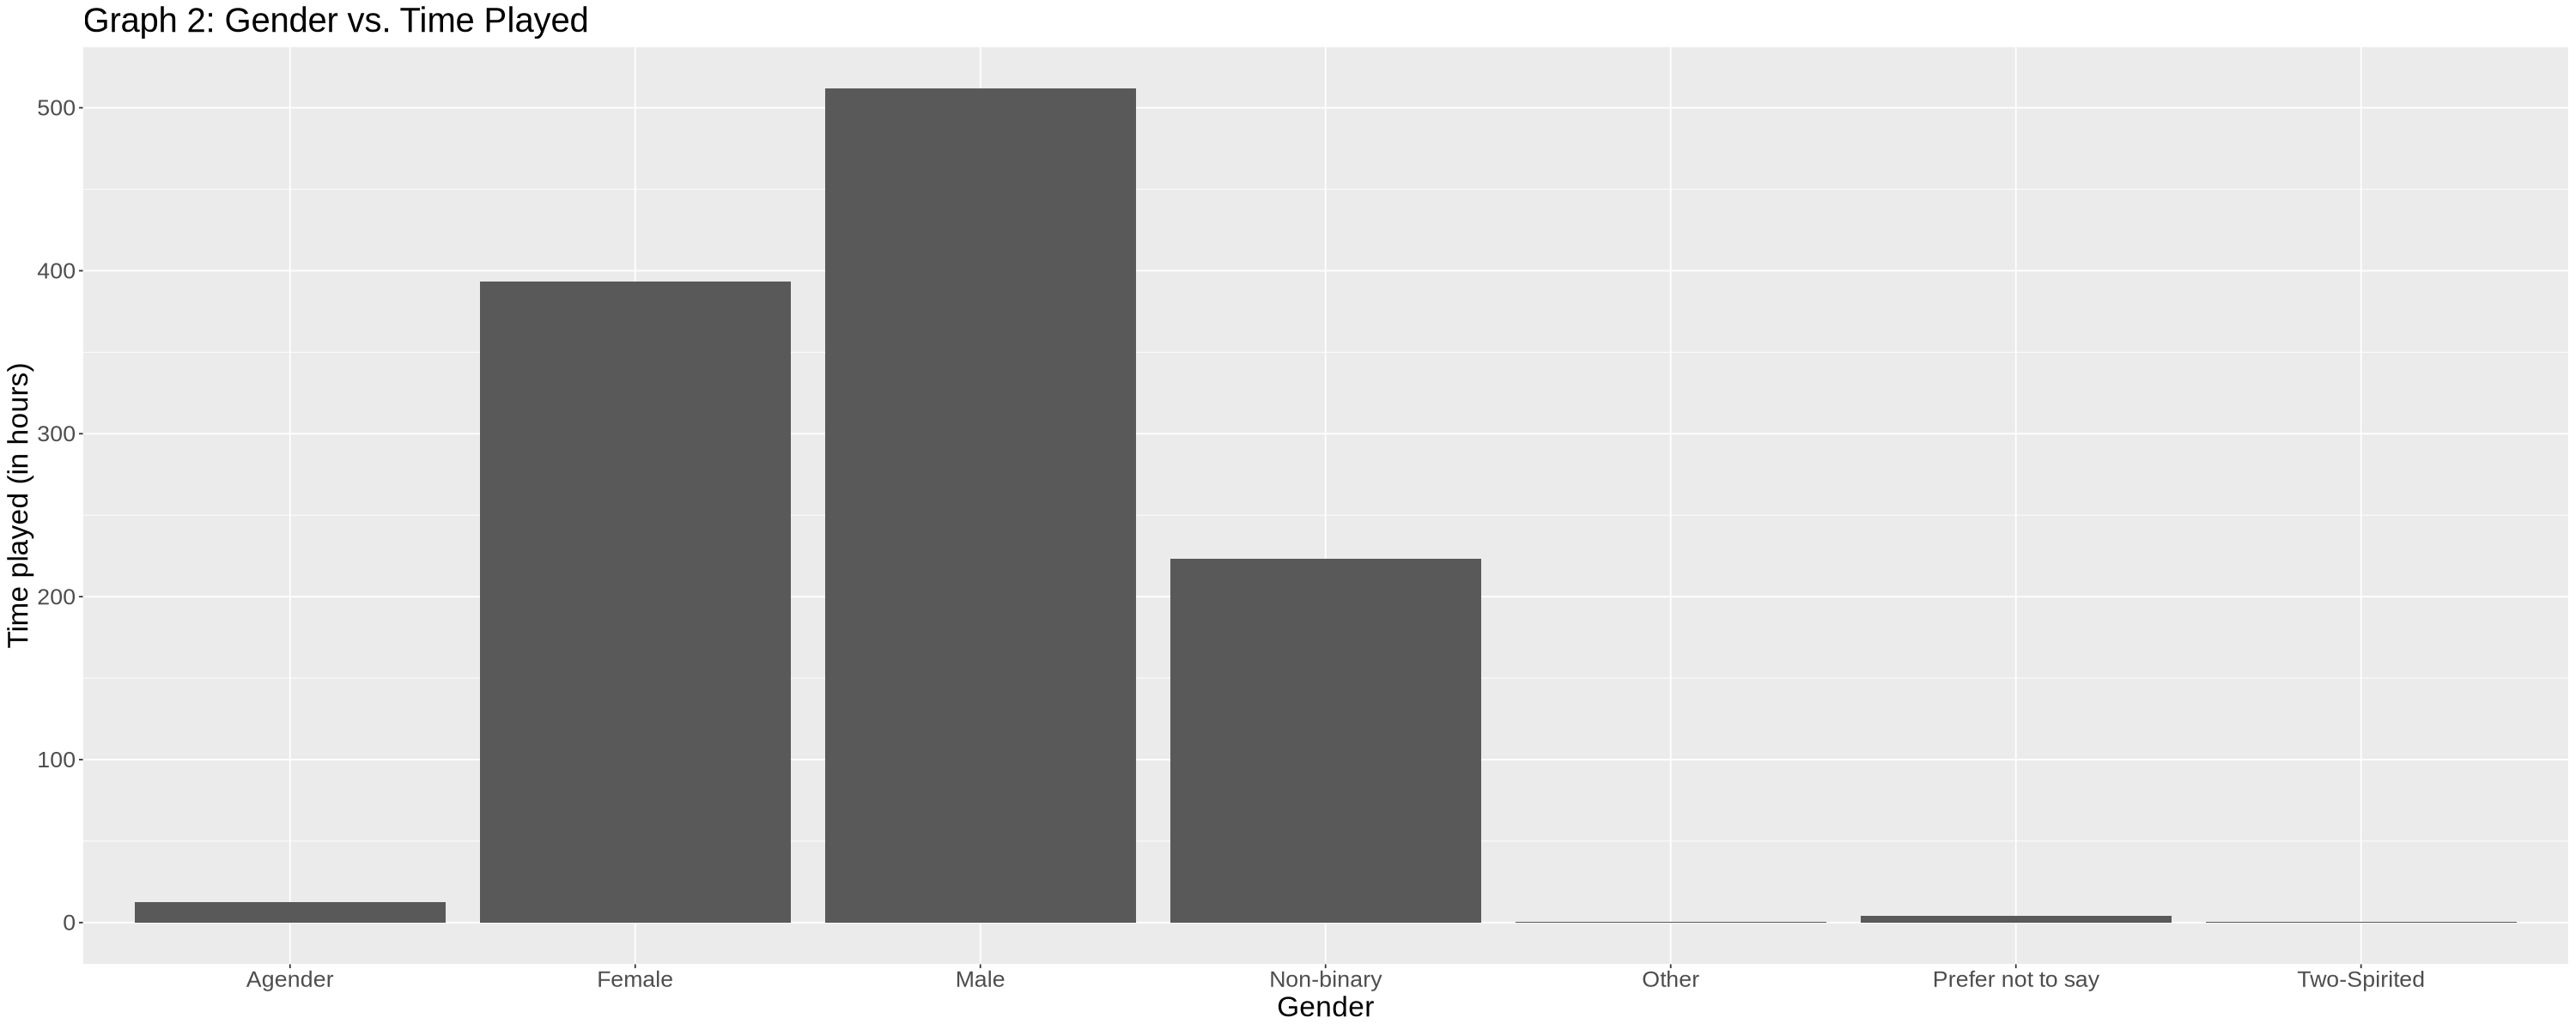

In [9]:
gender_plot <- ggplot(players_relevant, aes(x = gender, y = played_hours)) +
                geom_bar(stat = "identity") +
                labs(x = "Gender", y = "Time played (in hours)") +
                ggtitle("Graph 2: Gender vs. Time Played") +
                theme(text = element_text(size=20)) 
gender_plot

For graph 2, I see that people who identiy as male contribute the most time, with females being second most, and non-binary people in the 3rd most likely contributors.

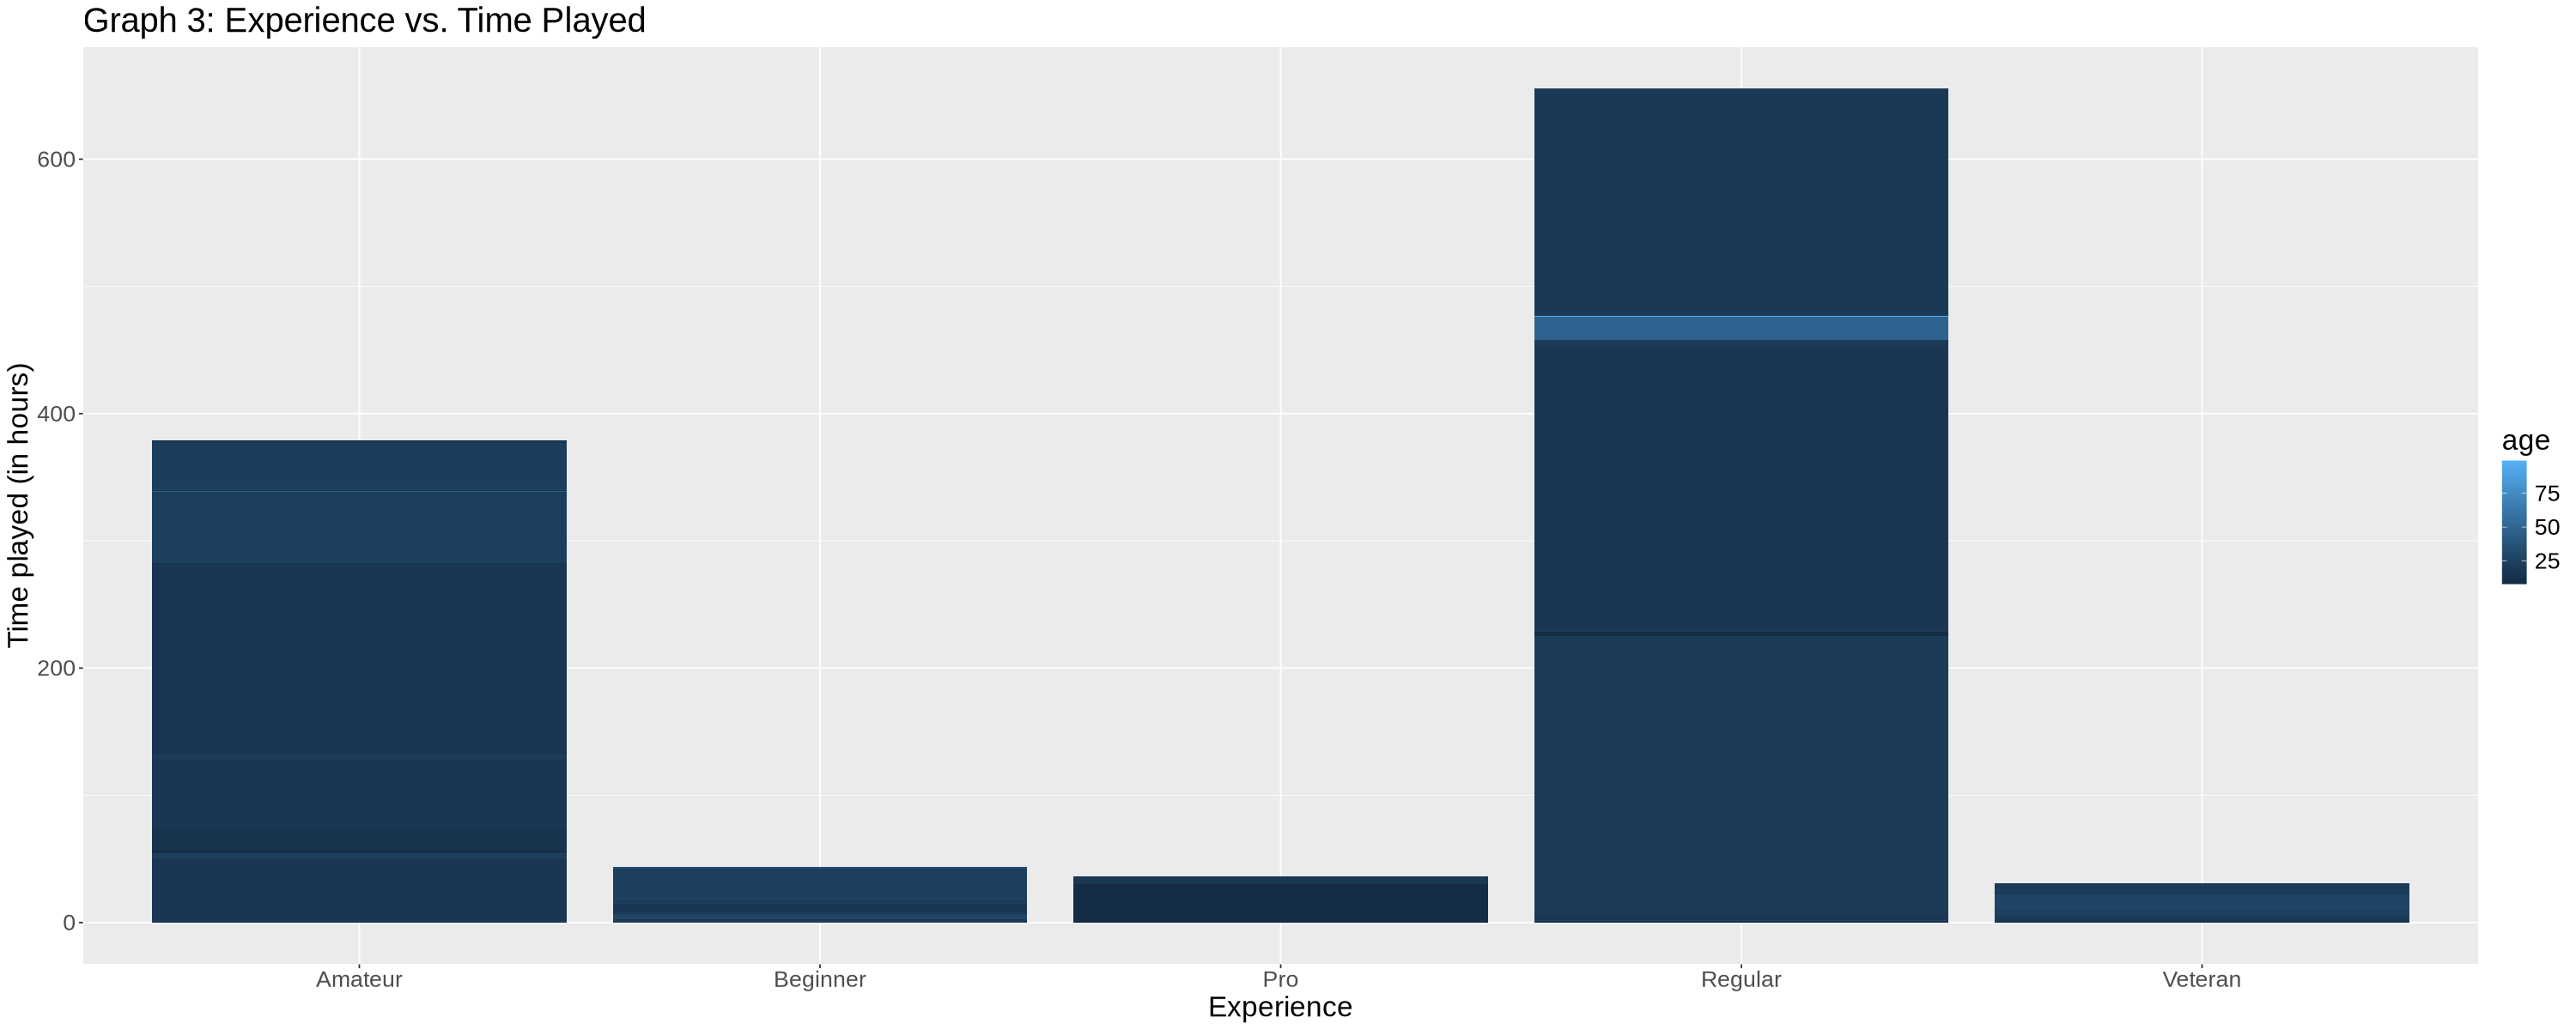

In [11]:
experience_plot <- gender_plot <- ggplot(players_relevant, aes(x = experience, y = played_hours, fill = age)) +
                geom_bar(stat = "identity") +
                labs(x = "Experience", y = "Time played (in hours)", color = "Age") +
                ggtitle("Graph 3: Experience vs. Time Played") +
                theme(text = element_text(size=20)) 
experience_plot

For graph 3, I see that regular and amateur players will contribute more time than any other experience level, and that veterna contribute the least amount of time. 

Warning message:
“Removed 18 rows containing missing values or values outside the scale range
(`geom_point()`).”


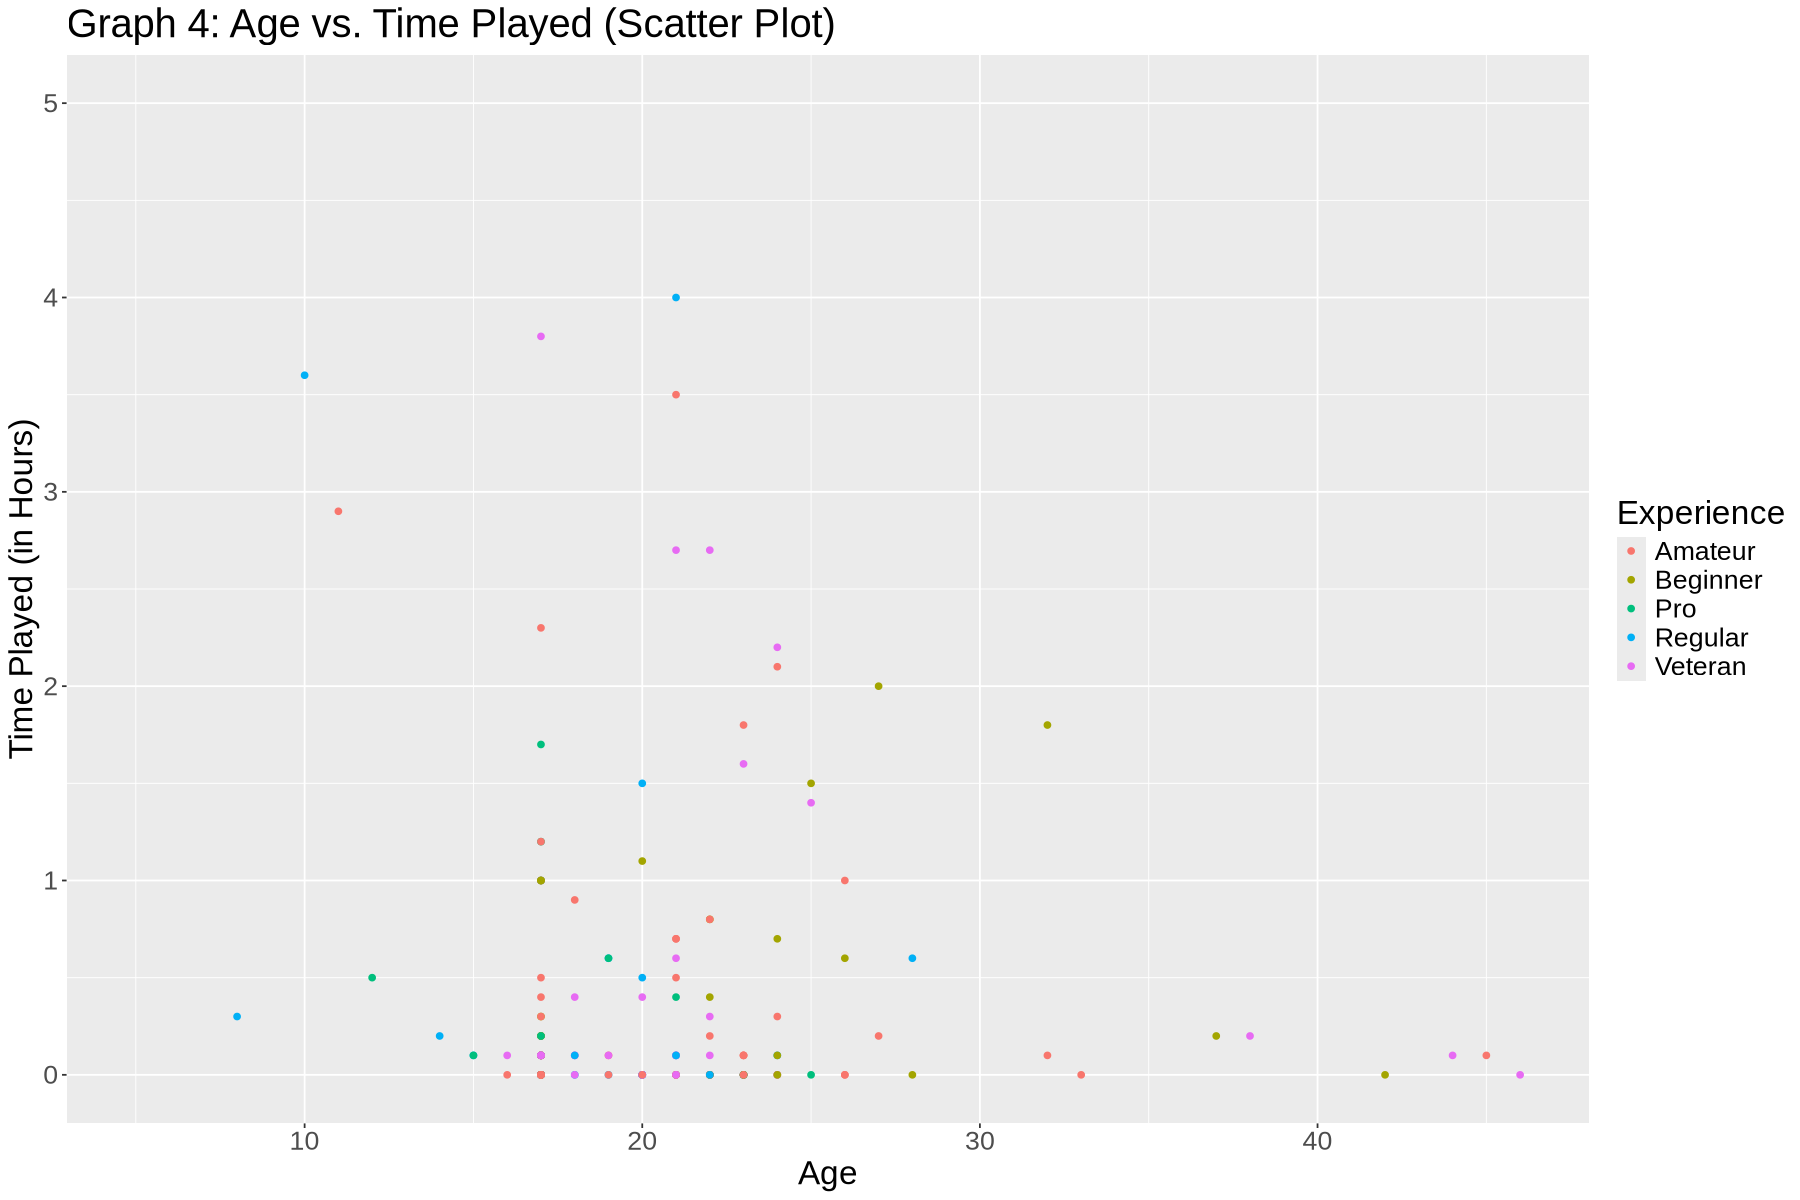

In [12]:
options(repr.plot.width = 15, repr.plot.height = 10) 
age_plot2 <- ggplot(players_relevant, aes(x = age,y = played_hours, color = experience)) +
                geom_point() +
                labs(x = "Age", y = "Time Played (in Hours)", color = "Experience") +
                ggtitle("Graph 4: Age vs. Time Played (Scatter Plot)") +
                theme(text = element_text(size=20)) +
                xlim(c(5, 46)) +
                ylim(c(0, 5)) +
                scale_fill_brewer(palette = 'Set3')
age_plot2

Graph 4 does not help me interpret data better than other graphs, but will be useful in the predictive portion of this project.

The method I will use to address my question is knn classicication. I chose this model because it allows me to predict a class given observations closest to the observation with the unknown class, which is also why it is appropriate. There are no assumptions that are required, and the only potential limitation is knn classificaton cab be slow as the data set gets larger, which could make te classfication take slightly longer than wanted. For comparing and selecting the right model, I will be running a 5-fold cross validation to determine the best number of neighbors, k, to use in my prediction mode. To process the data, I will be splitting the data into a training and testing set using the functions initial_split(), training(), and testing(). I will keep 75% of my data set for the training set, and set aside the remaining 25% for the testing set. I will split before running the model, so I can train the model on my training set and then have it make predictions on my testing set. There will be a validation set, and will be using 5-fold cross validation